In [ ]:
import io
import numpy as np
import sys
from gym.envs.toy_text import discrete
from IPython.display import Image

UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

class GridworldEnv(discrete.DiscreteEnv):
    """
    Grid World environment from Sutton's Reinforcement Learning book chapter 4.
    You are an agent on an MxN grid and your goal is to reach the terminal
    state at the top left or the bottom right corner.
    For example, a 4x4 grid looks as follows:
    T  o  o  o
    o  x  o  o
    o  o  o  o
    o  o  o  T
    x is your position and T are the two terminal states.
    You can take actions in each direction (UP=0, RIGHT=1, DOWN=2, LEFT=3).
    Actions going off the edge leave you in your current state.
    You receive a reward of -1 at each step until you reach a terminal state.
    """

    metadata = {'render.modes': ['human', 'ansi']}

    def __init__(self, shape=[6,6]):
        if not isinstance(shape, (list, tuple)) or not len(shape) == 2:
            raise ValueError('shape argument must be a list/tuple of length 2')
        
        
        # defining how many cells, and our NxN grid
        self.shape = shape
        nS = np.prod(shape)
        grid = np.arange(nS).reshape(shape)
        
        # number of actions
        nA = 4

        # finding location of walls
        MAX_Y = shape[0]
        MAX_X = shape[1]

        # instantiate our record of states and probabilities using a dictionary object
        P = {}
        
        # a method by which to iterate over our states: https://numpy.org/doc/stable/reference/generated/numpy.nditer.html
        it = np.nditer(grid, flags=['multi_index']) 

        while not it.finished:
            # iterating over all states and finding possible moves
            s = it.iterindex
            y, x = it.multi_index

            # P[s][a] = (prob, next_state, reward, is_done)
            P[s] = {a : [] for a in range(nA)} # n_Actions possible in state S

            # defining the rewards (0) if we are at one of the corners (the first index or the final index)
            is_done = lambda s: s == 0 or s == (nS - 1) 
            
            # otherwise we face a penalty for not being in the end state
            reward = 0.0 if is_done(s) else -1.0
            
            ### THIS IS FILLING IN P(s,r,s'). In our case moves are deterministic ie. if you chose the move up action, you will move up. 
            # We're in the terminal state, don't move (return current state s)
            if is_done(s):
                P[s][UP] = [(1.0, s, reward, True)]
                P[s][RIGHT] = [(1.0, s, reward, True)]
                P[s][DOWN] = [(1.0, s, reward, True)]
                P[s][LEFT] = [(1.0, s, reward, True)]
            # Not a terminal state
            else:
                # the possible new states you can enter by making a move. If we are running off the grid, don't move (return same state), otherwise move in the action direction.
                ns_up = s if y == 0 else s - MAX_X
                ns_right = s if x == (MAX_X - 1) else s + 1
                ns_down = s if y == (MAX_Y - 1) else s + MAX_X
                ns_left = s if x == 0 else s - 1
                
                # moving into new states. 
                P[s][UP] = [(1.0, ns_up, reward, is_done(ns_up))]
                P[s][RIGHT] = [(1.0, ns_right, reward, is_done(ns_right))]
                P[s][DOWN] = [(1.0, ns_down, reward, is_done(ns_down))]
                P[s][LEFT] = [(1.0, ns_left, reward, is_done(ns_left))]

            # take the next step if we still have moves to make
            it.iternext()
        
        # Initial state distribution is uniform
        isd = np.ones(nS) / nS

        # We expose the model of the environment for educational purposes
        # This should not be used in any model-free learning algorithm
        self.P = P

        super(GridworldEnv, self).__init__(nS, nA, P, isd)
        

    def render(self, mode='human', close=False):
        """ Renders the current gridworld layout
         For example, a 4x4 grid with the mode="human" looks like:
            T  o  o  o
            o  x  o  o
            o  o  o  o
            o  o  o  T
        where x is your position and T are the two terminal states.
        """
        if close:
            return

        outfile = io.StringIO() if mode == 'ansi' else sys.stdout

        grid = np.arange(self.nS).reshape(self.shape)
        it = np.nditer(grid, flags=['multi_index'])
        while not it.finished:
            s = it.iterindex
            y, x = it.multi_index

            if self.s == s:
                output = " x "
            elif s == 0 or s == self.nS - 1:
                output = " T "
            else:
                output = " o "

            if x == 0:
                output = output.lstrip()
            if x == self.shape[1] - 1:
                output = output.rstrip()

            outfile.write(output)

            if x == self.shape[1] - 1:
                outfile.write("\n")

            it.iternext()


In [ ]:
import numpy as np
import pprint
import sys

env = GridworldEnv()
# a cute graphic of grid world and where we start
env.render()

T  o  o  o  o  x
o  o  o  o  o  o
o  o  o  o  o  o
o  o  o  o  o  o
o  o  o  o  o  o
o  o  o  o  o  T


In [ ]:
# all the possible states you can be in, with all the possible actions you can take.
env.P

{0: {0: [(1.0, 0, 0.0, True)],
  1: [(1.0, 0, 0.0, True)],
  2: [(1.0, 0, 0.0, True)],
  3: [(1.0, 0, 0.0, True)]},
 1: {0: [(1.0, 1, -1.0, False)],
  1: [(1.0, 2, -1.0, False)],
  2: [(1.0, 7, -1.0, False)],
  3: [(1.0, 0, -1.0, True)]},
 2: {0: [(1.0, 2, -1.0, False)],
  1: [(1.0, 3, -1.0, False)],
  2: [(1.0, 8, -1.0, False)],
  3: [(1.0, 1, -1.0, False)]},
 3: {0: [(1.0, 3, -1.0, False)],
  1: [(1.0, 4, -1.0, False)],
  2: [(1.0, 9, -1.0, False)],
  3: [(1.0, 2, -1.0, False)]},
 4: {0: [(1.0, 4, -1.0, False)],
  1: [(1.0, 5, -1.0, False)],
  2: [(1.0, 10, -1.0, False)],
  3: [(1.0, 3, -1.0, False)]},
 5: {0: [(1.0, 5, -1.0, False)],
  1: [(1.0, 5, -1.0, False)],
  2: [(1.0, 11, -1.0, False)],
  3: [(1.0, 4, -1.0, False)]},
 6: {0: [(1.0, 0, -1.0, True)],
  1: [(1.0, 7, -1.0, False)],
  2: [(1.0, 12, -1.0, False)],
  3: [(1.0, 6, -1.0, False)]},
 7: {0: [(1.0, 1, -1.0, False)],
  1: [(1.0, 8, -1.0, False)],
  2: [(1.0, 13, -1.0, False)],
  3: [(1.0, 6, -1.0, False)]},
 8: {0: [(1.0,

In [ ]:
UP, RIGHT, DOWN, LEFT = (0,1,2,3)

# possible moves and new states at this grid state (location)
env.P[6]

{0: [(1.0, 0, -1.0, True)],
 1: [(1.0, 7, -1.0, False)],
 2: [(1.0, 12, -1.0, False)],
 3: [(1.0, 6, -1.0, False)]}

# Lab 7: TD-Learning with SARSA and Q-Learning

Without an MDP (model of environment), how do you find the optimal policy?
**Learn directly from episodes of experience!**
Update estimates after running out an entire episode, but can have incomplete estimates of the reward (**bootstrap**), as compared to Monte Carlo total sampling.

Sample policies and look at the average of their rewards.

In [ ]:
from collections import defaultdict
import itertools
import matplotlib
import numpy as np
import pandas as pd
from collections import namedtuple
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# easy tuple for storing outcomes from episodes. 
EpisodeStats = namedtuple("Stats",["episode_lengths", "episode_rewards"])

# plotting code

In [ ]:
from IPython.display import clear_output
from time import sleep

In [ ]:
def plot_episode_stats(epstats, smoothing_window=10, noshow=False):
    # Plot the episode length over time
    # shows how long each episode is taking early versus later when we have a more Q
    fig1 = plt.figure(figsize=(10,5))
    plt.plot(stats.episode_lengths)
    plt.xlabel("Episode")
    plt.ylabel("Episode Length")
    plt.title("Episode Length over Time")
    plt.ylim([0,200])
    if noshow:
        plt.close(fig1)
    else:
        plt.show(fig1)

    # Plot the episode reward over time, rolling average window
    # shows 
    fig2 = plt.figure(figsize=(10,5))
    rewards_smoothed = pd.Series(epstats.episode_rewards).rolling(smoothing_window, min_periods=smoothing_window).mean()
    plt.plot(rewards_smoothed)
    plt.xlabel("Episode")
    plt.ylabel("Episode Reward (Smoothed)")
    plt.title("Episode Reward over Time (Smoothed over window size {})".format(smoothing_window))
    if noshow:
        plt.close(fig2)
    else:
        plt.show(fig2)

    # Plot time steps and episode number, cumulative sum.
    # shows how many steps we are taking early on versus later when we have a more refined policy
    fig3 = plt.figure(figsize=(10,5))
    plt.plot(np.cumsum(epstats.episode_lengths), np.arange(len(stats.episode_lengths)))
    plt.xlabel("Time Steps")
    plt.ylabel("Episode")
    plt.xlim([0,7000])
    plt.title("Episode per time step")
    if noshow:
        plt.close(fig3)
    else:
        plt.show(fig3)

    return fig1, fig2, fig3

We are trying to learn the **state-value** function V(state) for a given policy, without any information about the environment. We are also learning the **action-value** function Q(state, action), which contains the value of taking an action in a given state under a given policy. Again, we are leaning information about our policy using episode experiences as data. 

In this case, our policy is an epsilon greedy one.

In [ ]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])  # policy is implicitly represented by the Q values.
        A[best_action] += (1.0 - epsilon) # allowing the possibility of exploration (epsilon) and not exploitation (1s)
   
        return A
    return policy_fn

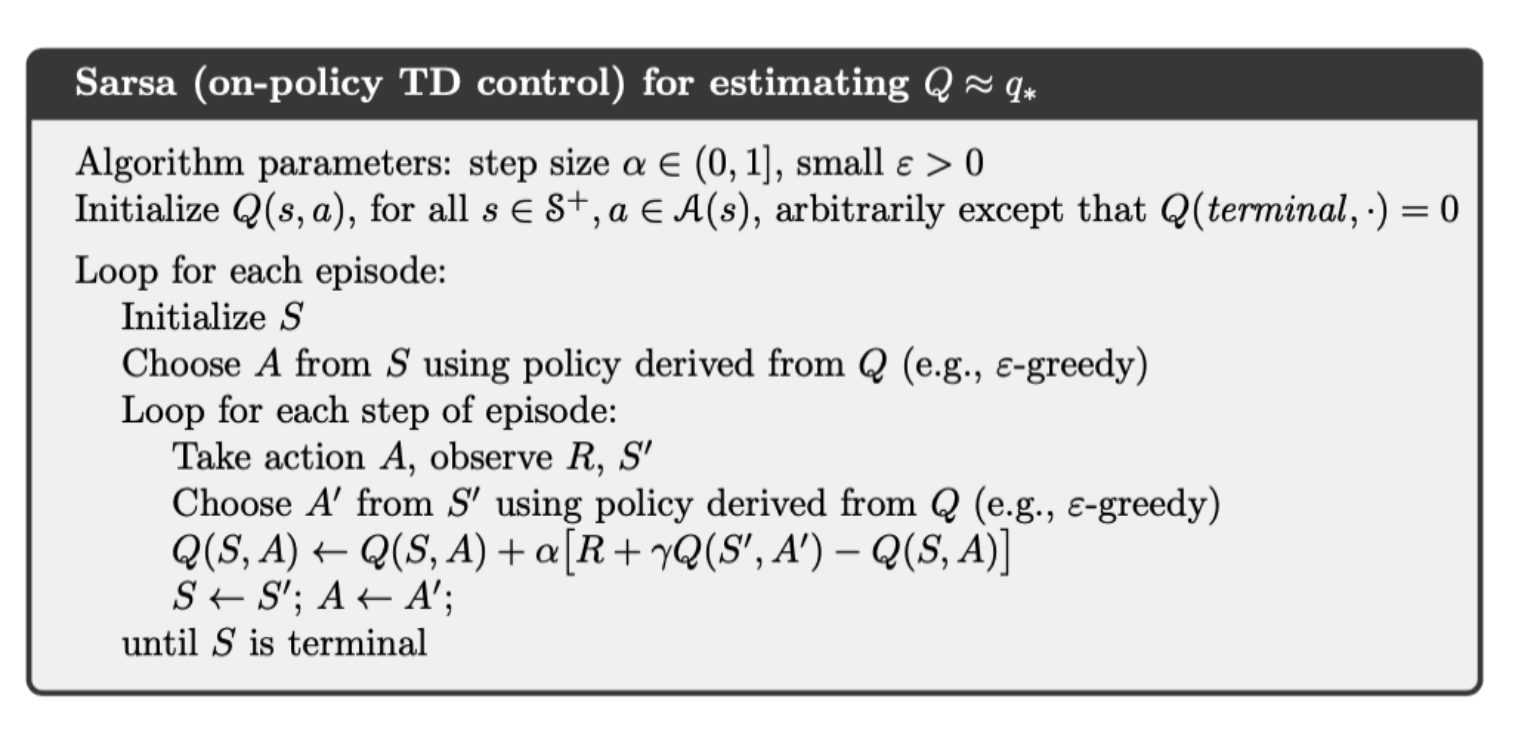

In [ ]:
Image(filename='SARSA.png')

# SARSA

In [ ]:
def sarsa(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.2):
    """
    SARSA algorithm: On-policy TD control. Finds the optimal epsilon-greedy policy.
    
    Args:
        env: environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, stats).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    
    # Keeps track of useful statistics
    stats = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))

    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    # one episode of "experience" that we use to allow the machine to learn 
    for i_episode in range(num_episodes):
        
        # Reset the environment and pick the first action
        # so we have essentially no model of the environment, hence "model-free"
        state = env.reset()
        action_probs = policy(state)
        action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
        
        # One step in the environment
        # done by randomly initating an agent until it reaches the terminal state: Q(state,action) = 0. 
        # Terminal states are sometimes required, as they allow our estimates to be "grounded" in a real reward instead of just chains of estimates.
        # this is the differnce between "playing the game" with SARSA vs. "pinging the board" with a model of the environment.
        for t in itertools.count():
            # Take a step
            next_state, reward, done, _ = env.step(action)
            
            # Pick the next action
            # note that we are not intelligently picking actions. this is why SARSA is "on-policy" learning; we are always picking actions with our policy
            next_action_probs = policy(next_state)  # the epsilon policy we are using to pick actions.
            next_action = np.random.choice(np.arange(len(next_action_probs)), p=next_action_probs)
            
            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # TD Update
            td_target = reward + discount_factor * Q[next_state][next_action] # two parts, immediate reward + discounted value of next step. Similar to Bellman.
            td_delta = td_target - Q[state][action] # the difference between our td-target estimated reward after taking the step (it is "random") and our estimate before taking the step. 
            Q[state][action] += alpha * td_delta # updating our action-value function Q(state, action) 
    
            # if we wandered into a terminal state, end the episode.
            if done:
                break
           
            action = next_action
            state = next_state  

            # rendering and plotting the actions we take
            if i_episode % 15 == 0:
              clear_output(wait=True)
              env.render()
              print(f"Episode: {i_episode}")
              # print(f"Timestep: {t + 1}")
              # print(f"State: {state}")
              # print(f"Action: {action}")
              # print(f"Reward: {reward}")
              for x in sorted(Q.items()):
                print(x)
              sleep(.2)

            
    # SHOULD converge to the true value function. but there is a bias variance trade-off. 
    return Q, stats

In [ ]:
env = GridworldEnv()
env.render()

T  o  o  o  o  o
o  o  o  o  o  o
o  o  o  o  o  o
o  o  o  o  o  o
o  o  o  o  o  o
x  o  o  o  o  T


In [ ]:
env.step(0)
env.render()

T  o  o  o  o  o
o  o  o  o  o  o
o  o  o  o  o  o
o  o  o  o  o  o
o  x  o  o  o  o
o  o  o  o  o  T


In [ ]:
Q, stats = sarsa(env, 200)

T  o  o  o  o  o
o  o  o  o  o  o
o  o  o  o  o  o
o  o  x  o  o  o
o  o  o  o  o  o
o  o  o  o  o  T
Episode: 115
Timestep: 3
State: 20
Action: 2
Reward: -1.0
(0, array([0., 0., 0., 0.]))
(1, array([-1.74951172, -2.203125  , -1.125     , -0.99999997]))
(2, array([-2.95703125, -2.85302734, -2.65820312, -2.00022498]))
(3, array([-3.70874023, -3.95703125, -3.296875  , -3.01005235]))
(4, array([-4.31152344, -4.65510845, -4.13671875, -4.04164001]))
(5, array([-5.68629932, -5.6960845 , -4.9427886 , -4.85229492]))
(6, array([-0.99999976, -1.5       , -1.25      , -1.49999237]))
(7, array([-1.99187541, -2.453125  , -2.96017456, -1.97576904]))
(8, array([-2.99505663, -2.81933594, -3.56787109, -2.85033035]))
(9, array([-3.69763184, -3.48046875, -3.77539062, -3.72406006]))
(10, array([-4.53277779, -4.40720272, -4.53100586, -4.04174805]))
(11, array([-4.85449219, -4.32714844, -4.18307537, -4.47485352]))
(12, array([-1.99992537, -2.21875   , -2.53125   , -2.72949219]))
(13, array([-2.96322107, -3.

KeyboardInterrupt: ignored

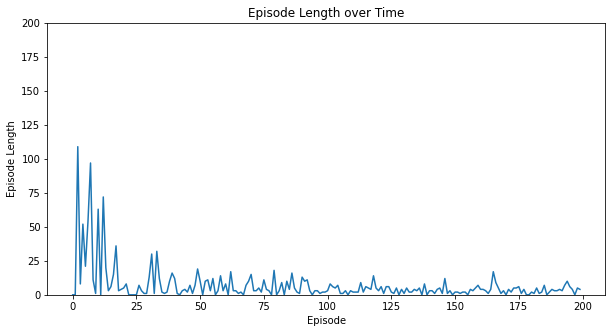

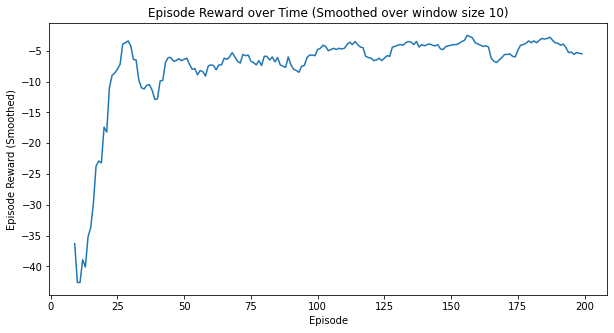

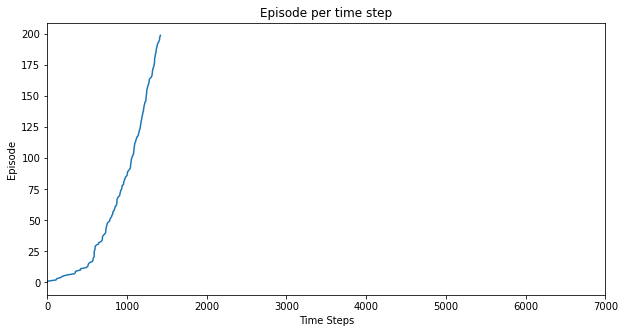

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plot_episode_stats(stats)

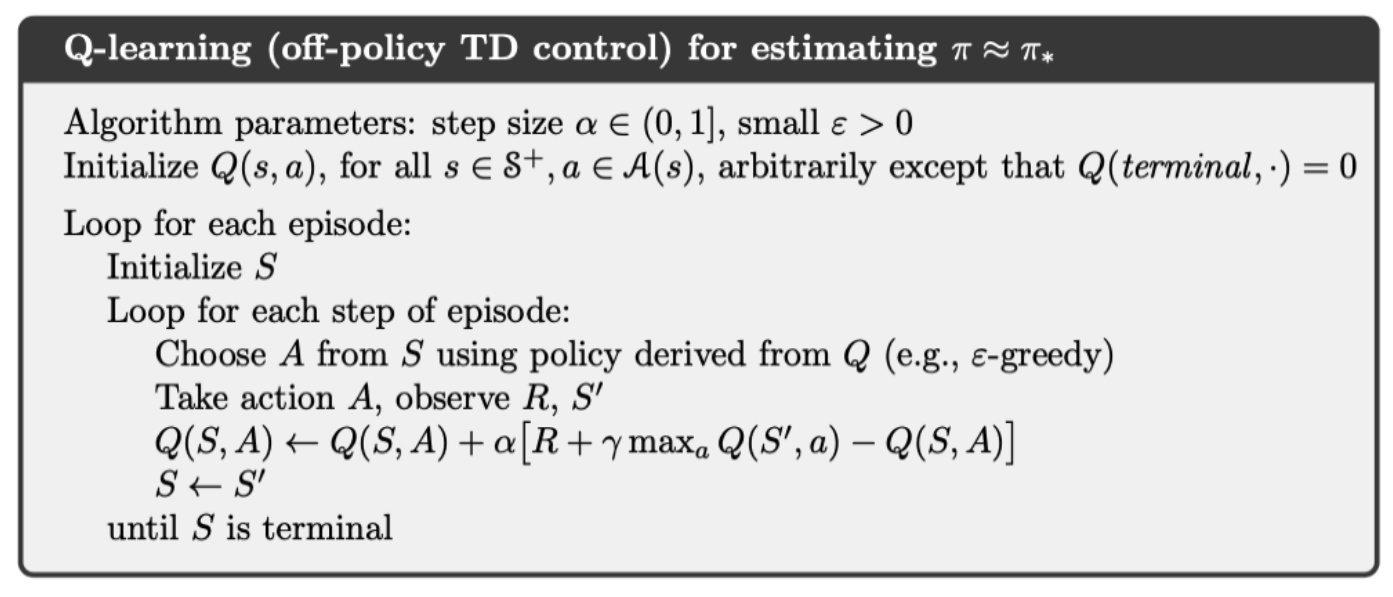

In [ ]:
Image(filename='QLearning.png')

# Q Learning

In [ ]:
def q_learning(env, num_episodes, discount_factor=1.0, alpha=0.5, epsilon=0.2):
    """
    Q-Learning algorithm: Off-policy TD control. Finds the optimal greedy policy
    while following an epsilon-greedy policy.
    
    Args:
        env: environment.
        num_episodes: Number of episodes to run for.
        discount_factor: Gamma discount factor.
        alpha: TD learning rate.
        epsilon: Chance to sample a random action. Float between 0 and 1.
    
    Returns:
        A tuple (Q, episode_lengths).
        Q is the optimal action-value function, a dictionary mapping state -> action values.
        stats is an EpisodeStats object with two numpy arrays for episode_lengths and episode_rewards.
    """
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))

    # Keeps track of useful statistics
    stats = EpisodeStats(
        episode_lengths=np.zeros(num_episodes),
        episode_rewards=np.zeros(num_episodes))    
    
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    
    for i_episode in range(num_episodes):
        
        # Reset the environment and pick the first action
        state = env.reset()
        
        # One step in the environment
        # total_reward = 0.0
        for t in itertools.count():
            
            # Take a step
            # generating data using our given policy
            # use this data later to learn about a more optimal policy. 
            
            action_probs = policy(state)
            action = np.random.choice(np.arange(len(action_probs)), p=action_probs)
            next_state, reward, done, _ = env.step(action)

            # Update statistics
            stats.episode_rewards[i_episode] += reward
            stats.episode_lengths[i_episode] = t
            
            # TD Update
            # in Q-Learning, this is "off-policy" learning because we are picking the best action very greedily (arg max). 
            # therefore, we are not learning about the given policy, but about the optiaml greedy policy while following the given policy.
            # It allows us to take the best action and avoid costly learning (if robot falls of cliff, you lose a game in a tournament, etc.)
            
            best_next_action = np.argmax(Q[next_state])  ### THE KEY DIFFERENCE BETWEEN SARASA AND Q-LEARNING
            
            # now we use the estimate of the action-value when taking the best possible action in the next state (which is a new policy)
            
            td_target = reward + discount_factor * Q[next_state][best_next_action] # Q(state, best action) as compared to Q(state, random action)
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            
            # if at terminal state
            if done:
                break
                
            state = next_state

            # rendering the environment
            if i_episode % 5 == 0:
              clear_output(wait=True)
              env.render()
              print(f"Episode: {i_episode}")
              # print(f"Timestep: {t + 1}")
              # print(f"State: {state}")
              # print(f"Action: {action}")
              # print(f"Reward: {reward}")
              for x in sorted(Q.items()):
                print(x)
              sleep(.1)
      
    return Q, stats

In [ ]:
Q, statsq = q_learning(env, 200)
sorted(Q.items())

T  o  o  o  o  o
o  o  o  o  o  o
x  o  o  o  o  o
o  o  o  o  o  o
o  o  o  o  o  o
o  o  o  o  o  T
Episode: 120
(0, array([0., 0., 0., 0.]))
(1, array([-1.49996948, -1.99980068, -2.41918945, -0.99999997]))
(2, array([-2.49697876, -2.77734375, -2.0625    , -1.99994978]))
(3, array([-3.        , -3.453125  , -3.61566162, -2.94806671]))
(4, array([-4.26953125, -4.26367188, -4.60742188, -3.78215408]))
(5, array([-4.25      , -4.51757812, -4.33740234, -4.48388672]))
(6, array([-1.        , -1.125     , -2.90367384, -1.49999994]))
(7, array([-1.99251431, -3.48597622, -2.671875  , -1.99575019]))
(8, array([-2.91658688, -3.4765625 , -3.0078125 , -2.93670511]))
(9, array([-3.5234375 , -4.3671875 , -4.25732422, -3.57531738]))
(10, array([-4.27238846, -4.49398994, -4.18945312, -4.24093628]))
(11, array([-4.25      , -4.        , -3.92065527, -4.18212891]))
(12, array([-1.99999954, -3.40625   , -3.11711805, -2.496521  ]))
(13, array([-2.97489106, -4.05957031, -3.69238281, -2.9688217 ]))
(14, ar

KeyboardInterrupt: ignored

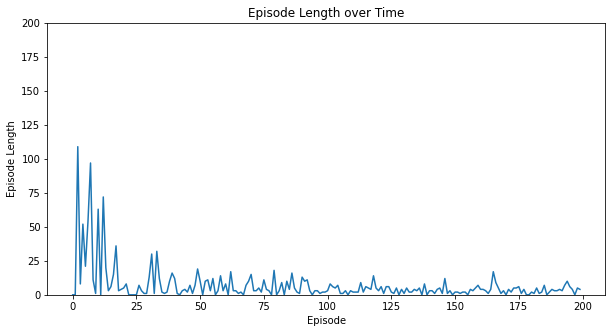

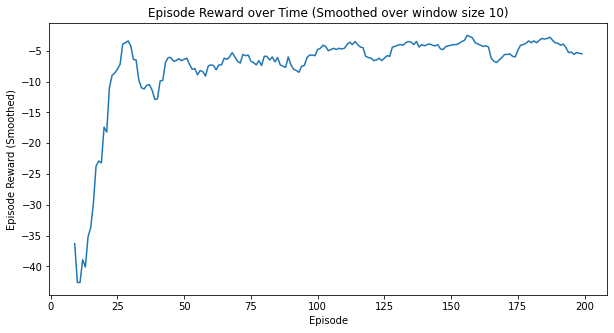

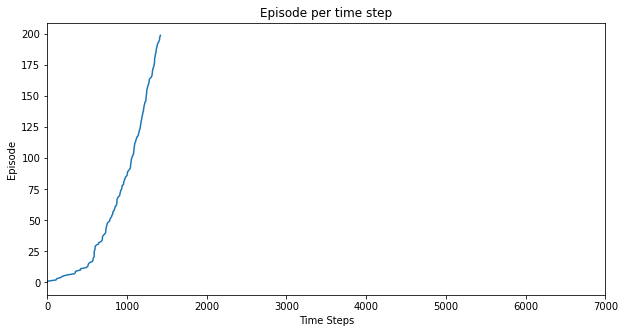

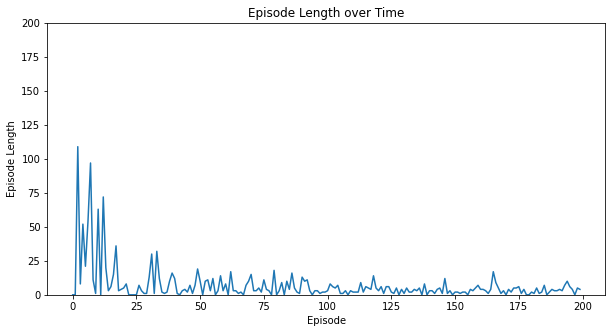

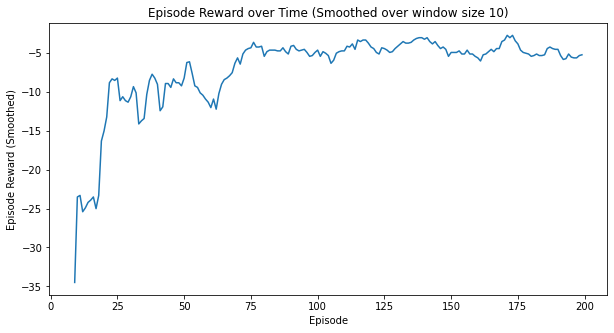

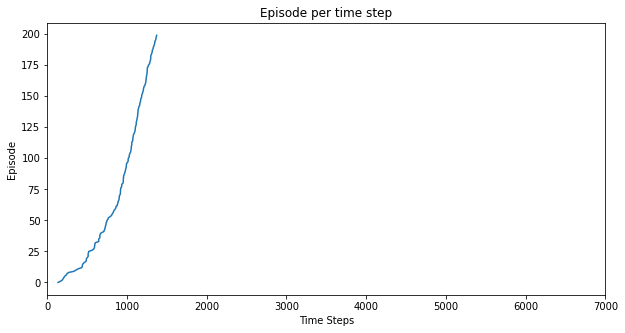

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plot_episode_stats(stats)
print('\n')
plot_episode_stats(statsq)

# When should SARSA be used and when should Q_Learning be used?

The environment is from here: https://github.com/openai/gym/tree/master/gym/envs/toy_text

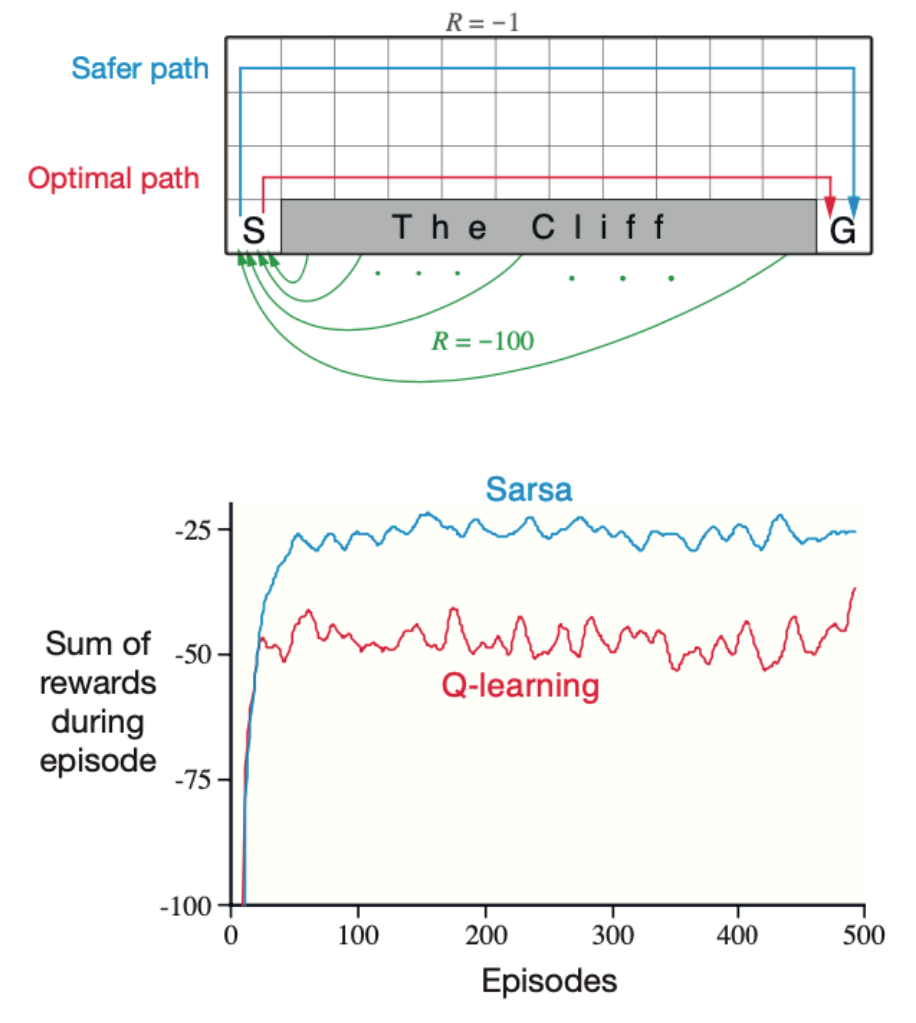

In [ ]:
Image(filename='SARSAvQ.png')

In [ ]:
import numpy as np
import sys
from gym.envs.toy_text import discrete


UP = 0
RIGHT = 1
DOWN = 2
LEFT = 3

# new cliff walking environment; a big negative reward when we walk off the cliff. 
# want to learn to avoid the cliffs as soon as possible.
class CliffWalkingEnv(discrete.DiscreteEnv):

    metadata = {'render.modes': ['human', 'ansi']}

    def _limit_coordinates(self, coord):
        coord[0] = min(coord[0], self.shape[0] - 1)
        coord[0] = max(coord[0], 0)
        coord[1] = min(coord[1], self.shape[1] - 1)
        coord[1] = max(coord[1], 0)
        return coord

    def _calculate_transition_prob(self, current, delta):
        new_position = np.array(current) + np.array(delta)
        new_position = self._limit_coordinates(new_position).astype(int)
        new_state = np.ravel_multi_index(tuple(new_position), self.shape)
        reward = -100.0 if self._cliff[tuple(new_position)] else -1.0
        is_done = self._cliff[tuple(new_position)] or (tuple(new_position) == (3,11))
        return [(1.0, new_state, reward, is_done)]

    def __init__(self):
        self.shape = (4, 12)

        nS = np.prod(self.shape)
        nA = 4

        # Cliff Location
        self._cliff = np.zeros(self.shape, dtype=np.bool)
        self._cliff[3, 1:-1] = True

        # Calculate transition probabilities
        P = {}
        for s in range(nS):
            position = np.unravel_index(s, self.shape)
            P[s] = { a : [] for a in range(nA) }
            P[s][UP] = self._calculate_transition_prob(position, [-1, 0])
            P[s][RIGHT] = self._calculate_transition_prob(position, [0, 1])
            P[s][DOWN] = self._calculate_transition_prob(position, [1, 0])
            P[s][LEFT] = self._calculate_transition_prob(position, [0, -1])

        # We always start in state (3, 0)
        isd = np.zeros(nS)
        isd[np.ravel_multi_index((3,0), self.shape)] = 1.0

        super(CliffWalkingEnv, self).__init__(nS, nA, P, isd)

    def render(self, mode='human', close=False):
        self._render(mode, close)

    def _render(self, mode='human', close=False):
        if close:
            return

        outfile = StringIO() if mode == 'ansi' else sys.stdout

        for s in range(self.nS):
            position = np.unravel_index(s, self.shape)
            # print(self.s)
            if self.s == s:
                output = " x "
            elif position == (3,11):
                output = " T "
            elif self._cliff[position]:
                output = " C "
            else:
                output = " o "

            if position[1] == 0:
                output = output.lstrip() 
            if position[1] == self.shape[1] - 1:
                output = output.rstrip() 
                output += "\n"

            outfile.write(output)
        outfile.write("\n")

In [ ]:
env = CliffWalkingEnv()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [ ]:
# our cliff world
env.render()
env.step(0)
env.render()

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  C  C  C  C  C  C  C  C  C  C  T

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T



In [ ]:
Q, stats = sarsa(env, 200)

o  o  o  o  o  o  o  o  o  x  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

Episode: 180
(0, array([-26.3696578 , -24.03421045, -28.13721337, -26.02446674]))
(1, array([-24.19606691, -23.60532564, -27.72239471, -24.74311795]))
(2, array([-23.12413148, -23.17192005, -24.05516412, -24.38563246]))
(3, array([-23.36220239, -23.18056663, -23.47184841, -23.44333322]))
(4, array([-23.65332352, -23.15960344, -23.64458542, -23.12373974]))
(5, array([-23.19651178, -23.74619299, -30.96311386, -23.15141267]))
(6, array([-23.91822398, -23.89148876, -23.67028494, -23.69092276]))
(7, array([-24.57858658, -24.22179657, -37.72151764, -24.05546467]))
(8, array([-23.59568262, -23.4171326 , -23.8587187 , -24.35893762]))
(9, array([-23.53238643, -23.10843314, -23.3414176 , -23.52524501]))
(10, array([-17.0721866 , -14.94266533, -27.53134236, -17.41382607]))
(11, array([-17.33069379, -17.67742574, -14.33542722, -17.19512491]))
(12, array([-25.

KeyboardInterrupt: ignored

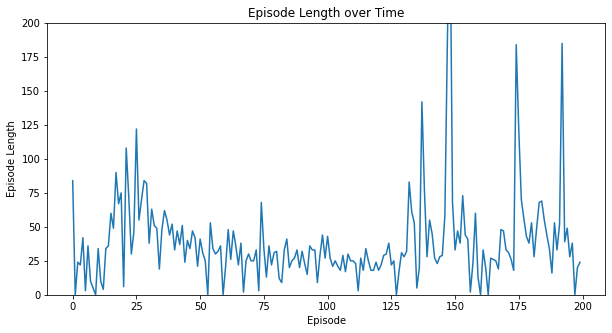

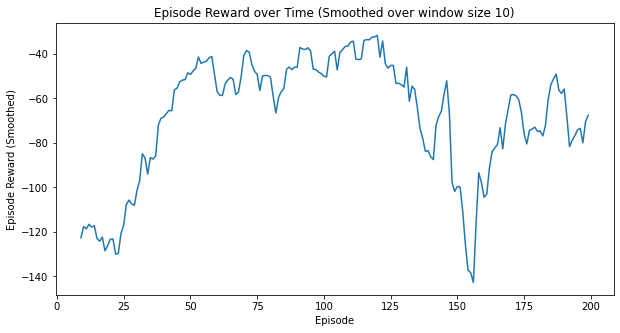

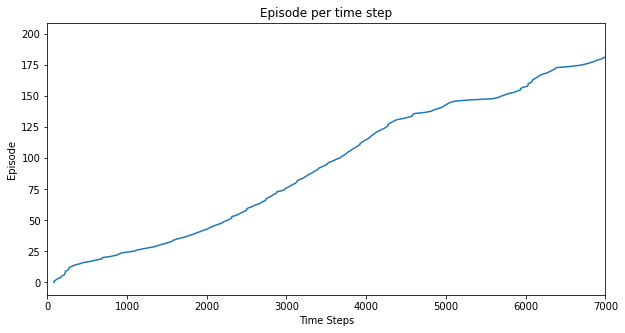

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plot_episode_stats(stats)

In [ ]:
# Q learning quickly learns to avoid the cliffs due to greedy action selection
Q, statsq = q_learning(env, 200)

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
x  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  T

Episode: 115
(0, array([-11.421875  , -11.36878173, -11.93266569, -11.15234497]))
(1, array([-11.08058572, -10.69185738, -10.87494579, -11.79104758]))
(2, array([-10.51535471, -10.48465127, -10.65443163, -10.64090625]))
(3, array([ -9.62007904,  -9.6486391 ,  -9.7089677 , -10.97696104]))
(4, array([-9.34370119, -8.90220469, -9.06673834, -9.90272675]))
(5, array([-8.37828255, -8.07801682, -8.41375657, -8.32261153]))
(6, array([-7.5699234 , -7.18371609, -7.58011638, -7.74057841]))
(7, array([-6.83518183, -6.34760137, -6.72798821, -7.1593632 ]))
(8, array([-5.625     , -5.51438133, -5.64410104, -6.56293221]))
(9, array([-5.11743164, -4.77321463, -4.78525091, -5.38632202]))
(10, array([-4.19921875, -3.918467  , -3.89977212, -4.53677368]))
(11, array([-3.79760456, -3.25      , -2.99011309, -3.66821289]))
(12, array([-11.72089124, -11.65845393, -12.1663

KeyboardInterrupt: ignored

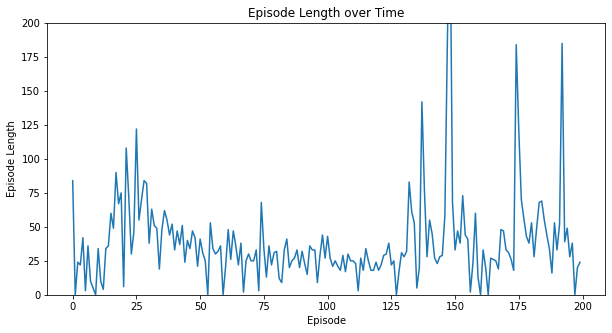

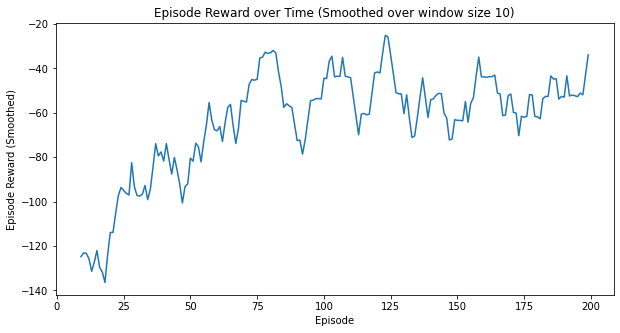

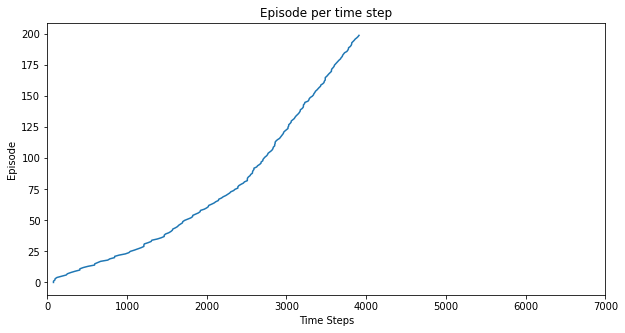

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [ ]:
plot_episode_stats(statsq)

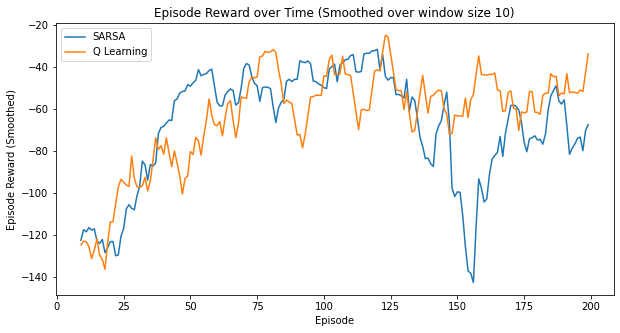

In [ ]:
fig2 = plt.figure(figsize=(10,5))
rewards_smoothed = pd.Series(stats.episode_rewards).rolling(10, min_periods=10).mean()
plt.plot(rewards_smoothed, label = 'SARSA')

rewards_smoothed = pd.Series(statsq.episode_rewards).rolling(10, min_periods=10).mean()
plt.plot(rewards_smoothed, label = 'Q Learning')
plt.xlabel("Episode")
plt.ylabel("Episode Reward (Smoothed)")
plt.title("Episode Reward over Time (Smoothed over window size {})".format(10))
plt.legend()
plt.show(fig2)

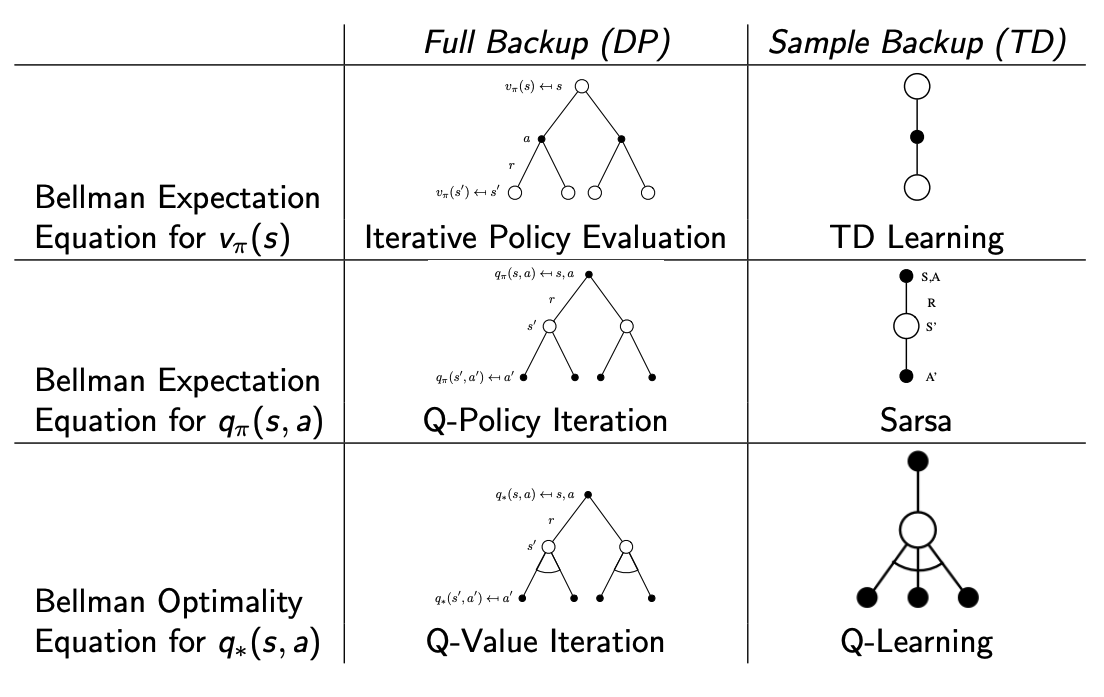

In [ ]:
Image(filename='Compare.png')

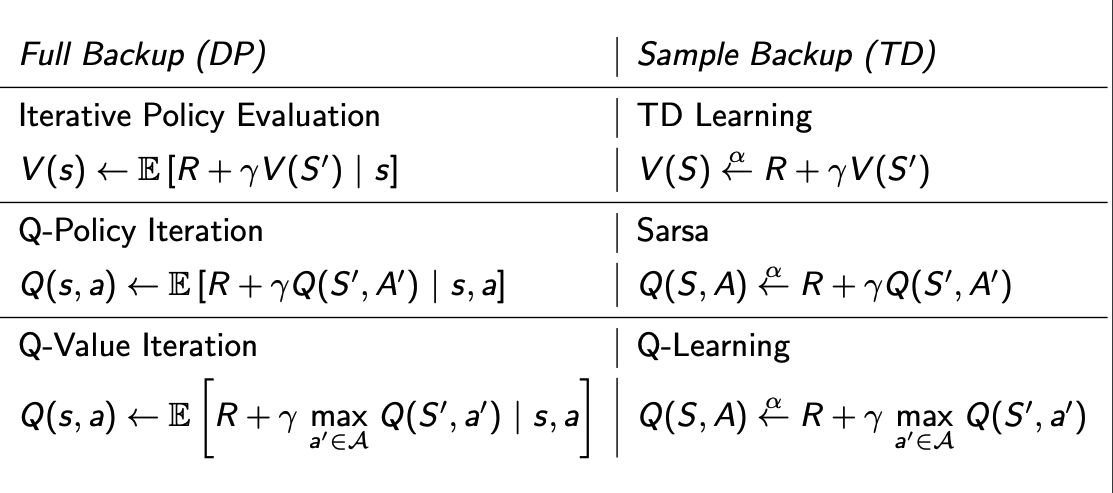

In [ ]:
Image(filename='Compare2.png')

# Good resources

https://www.youtube.com/watch?v=PnHCvfgC_ZA&list=PLqYmG7hTraZDM-OYHWgPebj2MfCFzFObQ&index=4

https://www.youtube.com/watch?v=0g4j2k_Ggc4&list=PLqYmG7hTraZDM-OYHWgPebj2MfCFzFObQ&index=5